<a href="https://colab.research.google.com/github/Manisha-Karim/Customer-Satisfaction/blob/main/Santander_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [297]:
import warnings
warnings.filterwarnings("ignore")

In [298]:
df = pd.read_csv("/content/drive/MyDrive/datasets/santander-customer-satisfaction/train.csv")

In [299]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [300]:
df.shape


(76020, 371)

In [301]:
df.drop(['ID'], axis = 1, inplace = True)

In [302]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False)


var3                       0.0
imp_trasp_var17_in_ult1    0.0
ind_var7_emit_ult1         0.0
imp_venta_var44_ult1       0.0
imp_venta_var44_hace3      0.0
                          ... 
num_op_var40_ult1          0.0
num_op_var40_hace3         0.0
num_op_var40_hace2         0.0
num_var25                  0.0
TARGET                     0.0
Length: 370, dtype: float64

# REMOVE FEATURES BASED ON VARIANCE

In [303]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0.02)
var_thresh.fit(df)
over_thresh = df.columns[var_thresh.get_support()]
over_thresh


col_novar = [column for column in df.columns
                     if column not in over_thresh]

In [304]:
col_novar

['ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40_0',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var32_0',
 'num_var32',
 'num_var33_0',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var44_0',
 'num_var44',
 'num_var46_0',
 'num_var46'

In [305]:
df.drop(col_novar, axis = 1, inplace =  True)

# REMOVE FEATURES BASED ON CORRELATION AMONGST THEMSELVES

In [306]:
col_corr= set()
corr_matrix = df.corr()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if(corr_matrix.iloc[i,j]> 0.9):
      colname= corr_matrix.columns[i]
      col_corr.add(colname)

In [307]:
col_corr

{'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var37',
 'ind_var37_0',
 'ind_var41_0',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_med_var22_ult3',
 'num_meses_va

In [308]:
df.drop(col_corr, axis = 1, inplace = True)

In [309]:
unique = []
for col in df:
  uni = df[col].nunique()
  unique.append([col, uni])

unique

[['var3', 208],
 ['var15', 100],
 ['imp_ent_var16_ult1', 596],
 ['imp_op_var39_comer_ult1', 7551],
 ['imp_op_var39_comer_ult3', 9099],
 ['imp_op_var40_comer_ult1', 293],
 ['imp_op_var40_comer_ult3', 346],
 ['imp_op_var40_efect_ult1', 23],
 ['imp_op_var40_efect_ult3', 29],
 ['imp_op_var40_ult1', 224],
 ['imp_op_var41_efect_ult1', 331],
 ['imp_op_var41_efect_ult3', 454],
 ['imp_op_var41_ult1', 8032],
 ['imp_sal_var16_ult1', 66],
 ['ind_var5_0', 2],
 ['ind_var5', 2],
 ['ind_var8_0', 2],
 ['ind_var12_0', 2],
 ['ind_var12', 2],
 ['ind_var13_0', 2],
 ['ind_var14_0', 2],
 ['ind_var24_0', 2],
 ['ind_var25_cte', 2],
 ['ind_var30', 2],
 ['ind_var37_cte', 2],
 ['ind_var39_0', 2],
 ['num_var1_0', 3],
 ['num_var1', 3],
 ['num_var4', 8],
 ['num_var12_0', 6],
 ['num_var13_largo_0', 7],
 ['num_var14_0', 5],
 ['num_var14', 4],
 ['num_var17_0', 11],
 ['num_var17', 9],
 ['num_var20_0', 2],
 ['num_var20', 2],
 ['num_var26_0', 9],
 ['num_op_var40_hace2', 19],
 ['num_op_var40_hace3', 5],
 ['num_op_var40_ult

In [310]:
df.dtypes.value_counts()

int64      80
float64    72
dtype: int64

# REMOVE FEATURES BASED ON CORRELATION WITH THE TARGET

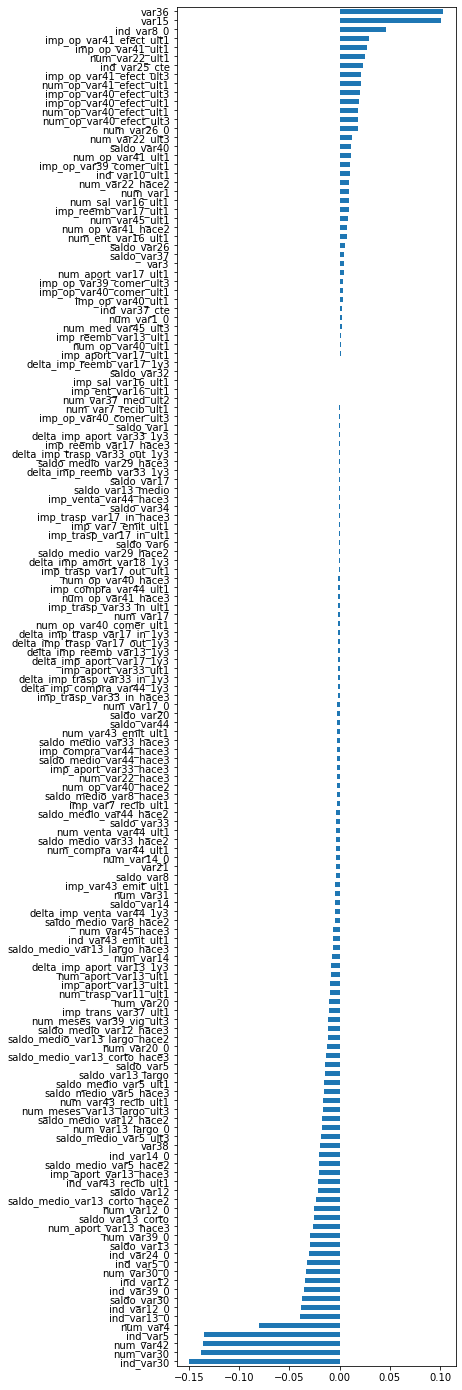

In [311]:
plt.figure(figsize = (5,25))
df.corr()['TARGET'].sort_values().drop('TARGET').plot(kind = 'barh') 

In [312]:
corr = df.corr()['TARGET'].sort_values().drop('TARGET')

In [313]:
low_corr = []

for i in range(len(corr)):
  if abs(corr[i]) < 0.001:
    l = (corr.index[i])
    low_corr.append(l)

low_corr

['imp_var7_emit_ult1',
 'imp_trasp_var17_in_hace3',
 'saldo_var34',
 'imp_venta_var44_hace3',
 'saldo_var13_medio',
 'saldo_var17',
 'delta_imp_reemb_var33_1y3',
 'saldo_medio_var29_hace3',
 'delta_imp_trasp_var33_out_1y3',
 'imp_reemb_var17_hace3',
 'delta_imp_aport_var33_1y3',
 'saldo_var1',
 'imp_op_var40_comer_ult3',
 'num_var7_recib_ult1',
 'num_var37_med_ult2',
 'imp_ent_var16_ult1',
 'imp_sal_var16_ult1',
 'saldo_var32',
 'delta_imp_reemb_var17_1y3']

In [314]:
corr[low_corr]

imp_var7_emit_ult1              -0.000997
imp_trasp_var17_in_hace3        -0.000980
saldo_var34                     -0.000963
imp_venta_var44_hace3           -0.000947
saldo_var13_medio               -0.000917
saldo_var17                     -0.000774
delta_imp_reemb_var33_1y3       -0.000736
saldo_medio_var29_hace3         -0.000736
delta_imp_trasp_var33_out_1y3   -0.000736
imp_reemb_var17_hace3           -0.000736
delta_imp_aport_var33_1y3       -0.000736
saldo_var1                      -0.000695
imp_op_var40_comer_ult3         -0.000358
num_var7_recib_ult1             -0.000290
num_var37_med_ult2              -0.000029
imp_ent_var16_ult1              -0.000017
imp_sal_var16_ult1               0.000509
saldo_var32                      0.000621
delta_imp_reemb_var17_1y3        0.000868
Name: TARGET, dtype: float64

In [315]:
df.drop(low_corr, axis = 1, inplace = True)

In [333]:
df.shape

(76020, 74)



> Split



In [317]:
X = df.drop(['TARGET'], axis =1)
y = df['TARGET']

# REMOVE FEATURES USING EXTRATREESCLASSIFIER

In [319]:
from sklearn.ensemble import ExtraTreesClassifier

In [320]:
# Building the model
extra_tree_forest = ExtraTreesClassifier()

# Training the model
extra_tree_forest.fit(X,y)

ExtraTreesClassifier()

In [321]:
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
									axis = 0)


In [322]:
feature_importance = pd.Series( feature_importance_normalized, index = X.columns)

In [323]:
feature_importance

var3                       0.000800
var15                      0.016769
imp_op_var39_comer_ult1    0.001064
imp_op_var39_comer_ult3    0.001204
imp_op_var40_comer_ult1    0.000232
                             ...   
saldo_medio_var33_hace2    0.000028
saldo_medio_var33_hace3    0.000011
saldo_medio_var44_hace2    0.000037
saldo_medio_var44_hace3    0.000030
var38                      0.015470
Length: 132, dtype: float64

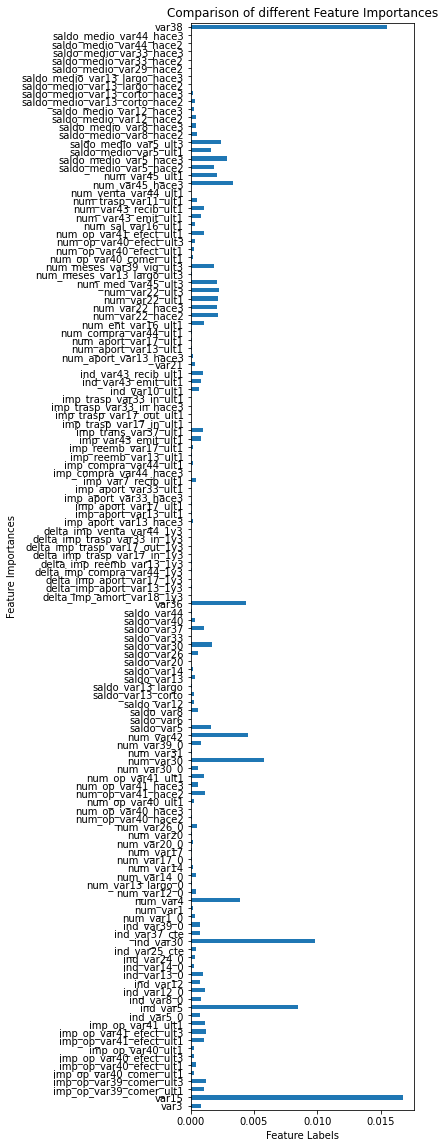

In [324]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (4, 20))
feature_importance.plot(kind = 'barh')
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


In [ ]:
tree_clf = []

for i in range(len(feature_importance)):
  if abs(feature_importance[i]) < 0.0003:
    l = (feature_importance.index[i])
    tree_clf.append(l)

tree_clf

In [330]:
len(tree_clf)

59

In [331]:
df.drop(tree_clf, axis = 1, inplace = True)

In [334]:
X.drop(tree_clf, axis = 1, inplace = True)

In [335]:
X.shape

(76020, 73)

# FEATURE SELECTION

In [336]:
num_feats = 25

In [337]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

25 selected features


In [338]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
25 selected features


In [339]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

12 selected features


In [340]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

25 selected features


In [341]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

16 selected features


In [353]:
# put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total', 'Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,var15,True,True,True,True,True,5
2,saldo_var30,True,True,True,True,True,5
3,var38,False,True,True,True,True,4
4,saldo_var5,False,True,True,True,True,4
5,saldo_medio_var5_ult3,False,True,True,True,True,4
6,saldo_medio_var5_ult1,False,True,True,True,True,4
7,saldo_medio_var5_hace2,False,True,True,True,True,4
8,num_var45_ult1,False,True,True,True,True,4
9,num_var22_ult3,False,True,True,True,True,4
10,num_var42,True,True,True,False,False,3


In [357]:
df = df [['var15', 'saldo_var30', 'var38', 'saldo_var5','saldo_medio_var5_ult3', 'saldo_medio_var5_ult1','saldo_medio_var5_hace2', 'num_var45_ult1', 'num_var22_ult3', 'num_var42', 'num_op_var41_efect_ult1','num_op_var40_efect_ult3','ind_var8_0','ind_var30','ind_var12', 'ind_var13_0' ]]

In [359]:
df.shape

(76020, 16)

In [360]:
X = df

In [363]:
y.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [364]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size= 0.30)

In [365]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_train,y_train=smk.fit_resample(X_train,y_train)
X_train.shape,y_train.shape

((97946, 16), (97946,))

In [366]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



> KNN



In [367]:
KNN_parameters = {
    'n_neighbors' : [ 3, 4, 5, 6, 8, 9, 10 ]
}

KNN_gridsearchcv = GridSearchCV(KNeighborsClassifier(), KNN_parameters)
KNN_gridsearchcv.fit(X_train, y_train)

KNN_model = KNN_gridsearchcv.best_estimator_
KNN_ypred = KNN_model.predict(X_test) 

KeyboardInterrupt: ignored

In [ ]:
accuracy_score( y_test, KNN_ypred)

In [ ]:
KNN_gridsearchcv.best_params_



> Decision Tree



In [ ]:
model = DecisionTreeClassifier(random_state = 4)
path = model.cost_complexity_pruning_path(X_train,y_train) #determines values of alpha
ccp_alphas = path.ccp_alphas #extract the values of alpha
ccp_alphas = ccp_alphas[ :-1] #removes the highest value of alpha cause this will prune all leaves

ccp_alphas 


In [ ]:
DT_parameters = {
    'ccp_alpha' : ccp_alphas,
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2'],
    'splitter' : ['best','random']

    }

DT_gridsearchcv = GridSearchCV(DecisionTreeClassifier( random_state = 4), DT_parameters, n_jobs = -1)
DT_gridsearchcv.fit(X_train, y_train)

DT_model = DT_gridsearchcv.best_estimator_
DT_ypred = DT_model.predict(X_test) 

In [ ]:
accuracy_score(DT_ypred,y_test)

In [ ]:
DT_gridsearchcv.best_params_



> **Random Forest**



In [369]:
RF_Parameters = {
               'n_estimators' : range( 10, 80, 5),               
               'max_samples' : range(344, 510, 20),
               'max_features' : ['sqrt', 'log2','None'],
                }


RF_gridsearchcv = GridSearchCV(RandomForestClassifier(ccp_alpha = 0.008848852529337863, max_depth = 6, n_jobs = -1), RF_Parameters)
RF_gridsearchcv.fit(X_train, y_train)

RF_model = RF_gridsearchcv.best_estimator_
RF_ypred = RF_model.predict(X_test)

In [372]:
accuracy_score(RF_ypred,y_test)

0.8486801718845918

In [373]:
RF_gridsearchcv.best_params_

{'max_features': 'log2', 'max_samples': 364, 'n_estimators': 25}

In [ ]:
data = {         
           'KNN': KNN_ypred, 
           'DECISION TREE' : DT_ypred,
           'RANDOM FOREST' : RF_ypred, 
}

models = pd.DataFrame(data) 

model_results = pd.DataFrame(columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC'])
    
 
for column in models:
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    results =pd.DataFrame([[column,acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)

model_results


In [368]:
# configure the model
lg_model = LogisticRegression()
# fit model on the training dataset
lg_model.fit(X_train, y_train)
	# evaluate on the train dataset
train_yhat = lg_model.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)

	# evaluate on the test dataset
test_yhat = lg_model.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
	# summarize progress
print(' train: %.2f, test: %.2f' % (train_acc, test_acc))


 train: 0.77, test: 0.70
